In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import re
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

C:\Users\user\AppData\Local\Temp/ipykernel_884/4183244084.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
train = pd.read_csv('../data/bike-sharing-demand/train.csv')
test= pd.read_csv('../data/bike-sharing-demand/test.csv')

In [3]:
train.info()
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
(10886, 12)


In [4]:
train['datetime']=pd.to_datetime(train['datetime'])

In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [170]:
datetime= train['datetime'] 

In [171]:
train['year'] =datetime.dt.year

In [172]:
train['month']=datetime.dt.month

In [173]:
train['day']=datetime.dt.day

In [174]:
train['hour']=datetime.dt.hour

In [175]:
train['minute']=datetime.dt.minute

In [176]:
train['second']=datetime.dt.second

In [177]:
train['dayofweek']=datetime.dt.dayofweek

<AxesSubplot:xlabel='year', ylabel='count'>

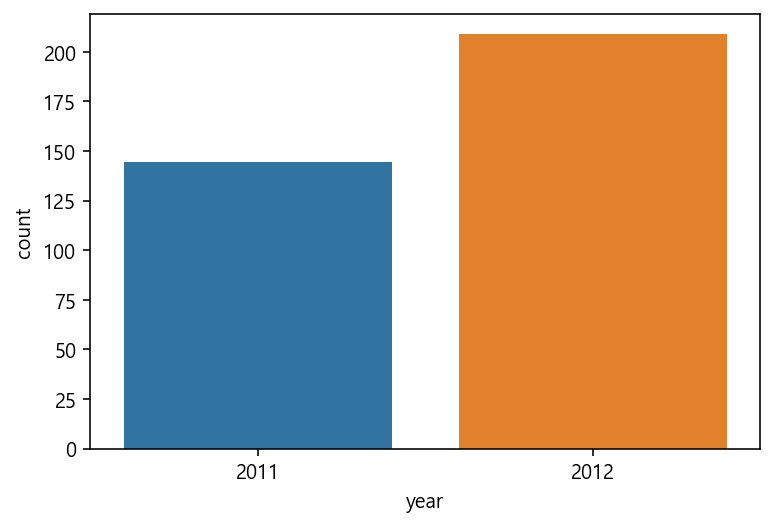

In [178]:
sns.barplot(data=train,x='year',y='count',ci=None)

<AxesSubplot:xlabel='month', ylabel='count'>

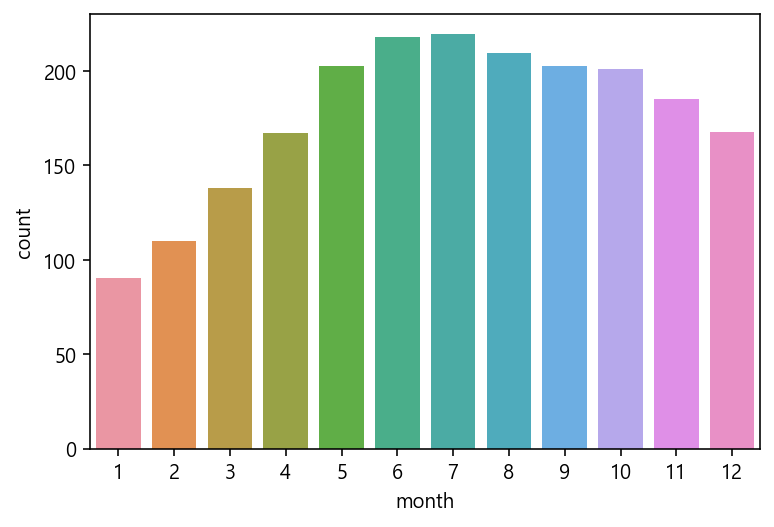

In [179]:
sns.barplot(data=train,x='month',y='count',ci=None)

<AxesSubplot:xlabel='hour', ylabel='count'>

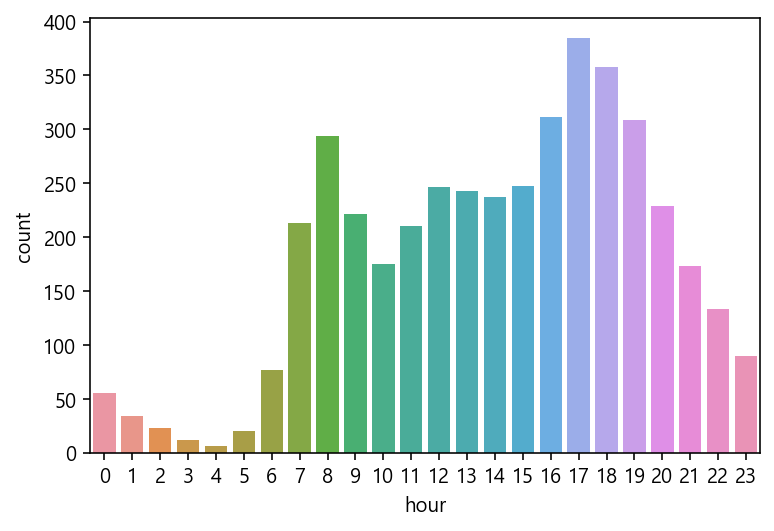

In [180]:
sns.barplot(data=train,x='hour',y='count',ci=None)

In [181]:
train.drop(columns=['minute','second'],inplace=True)

<AxesSubplot:xlabel='hour', ylabel='count'>

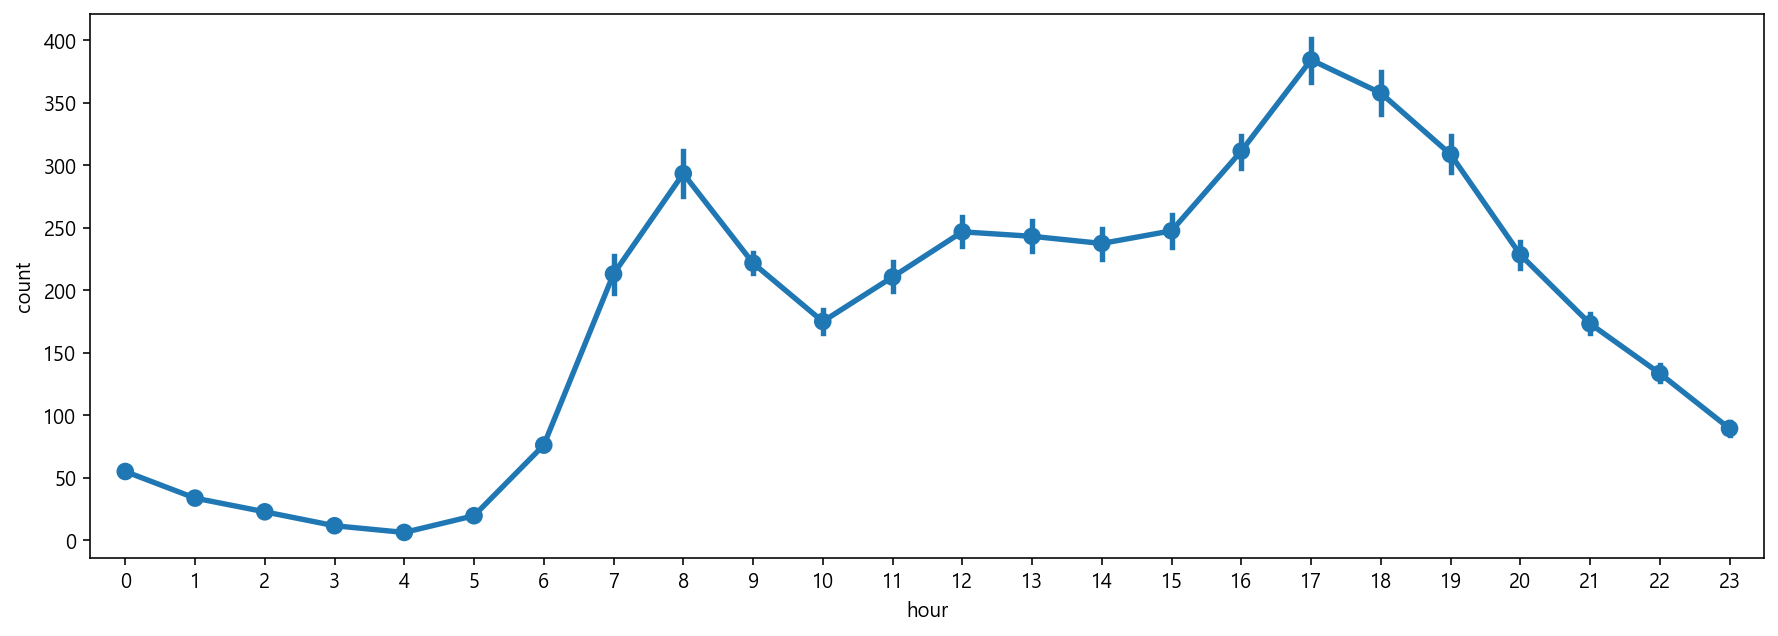

In [182]:
plt.figure(figsize=(15,5))
sns.pointplot(data=train,x='hour',y='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

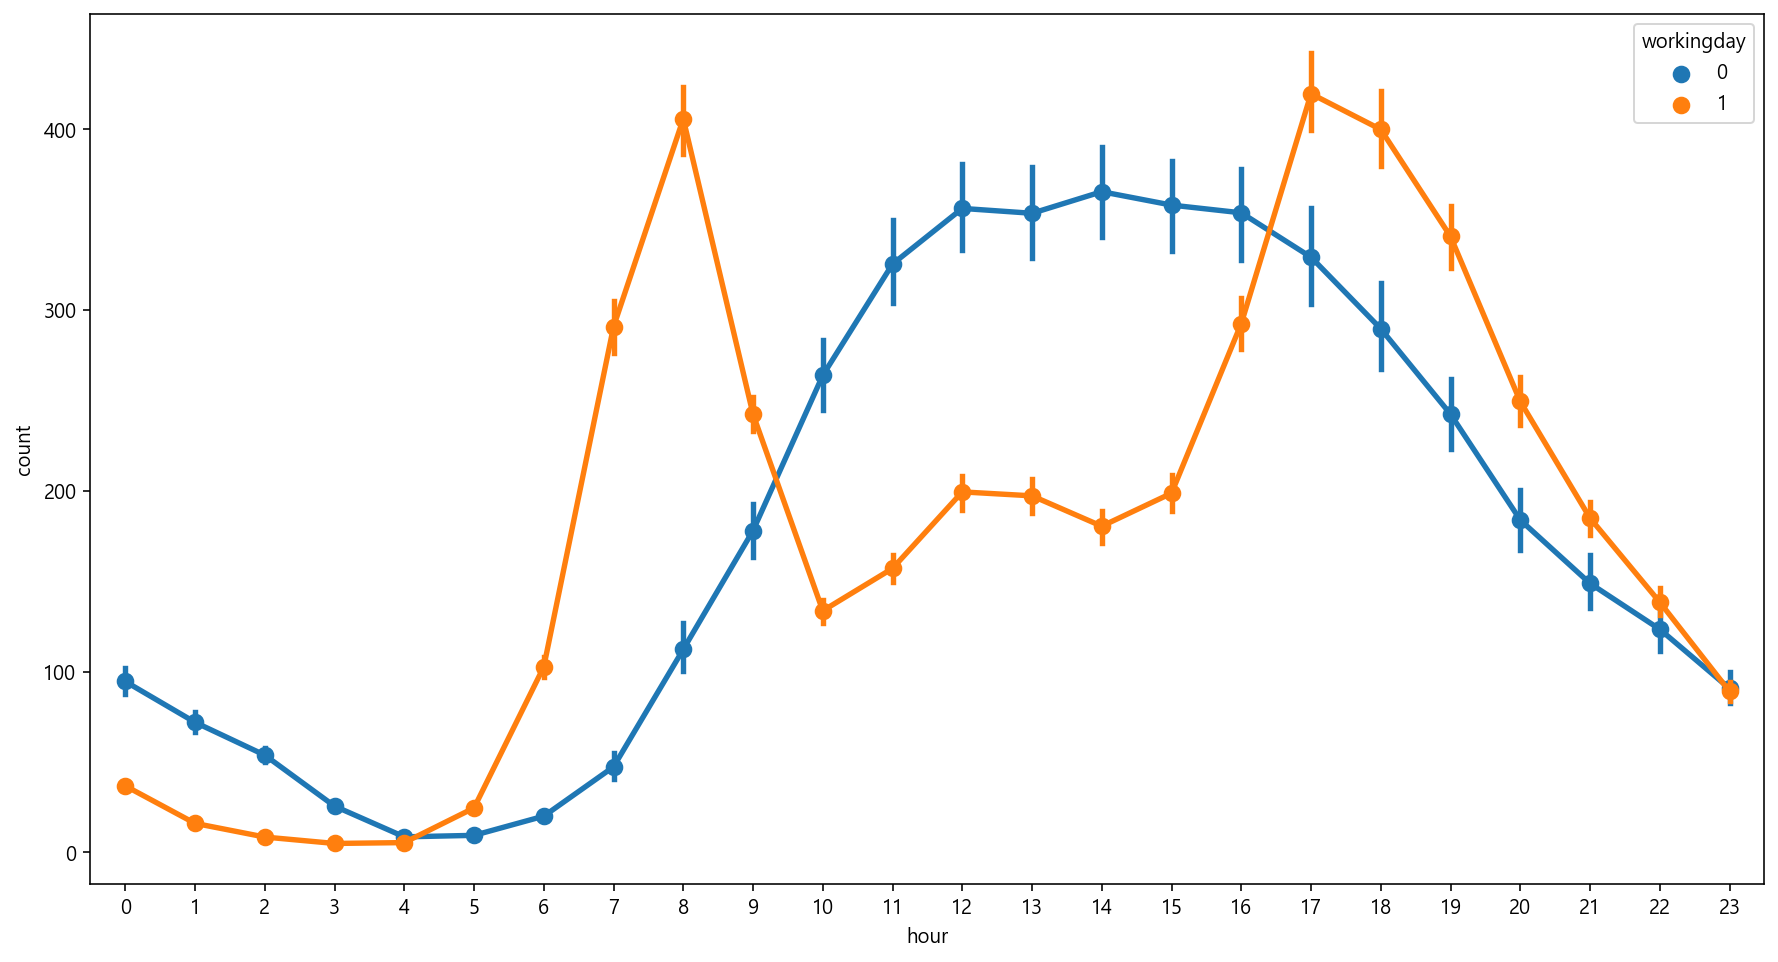

In [183]:
plt.figure(figsize=(15,8))
sns.pointplot(data=train,x='hour',y='count',hue='workingday')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

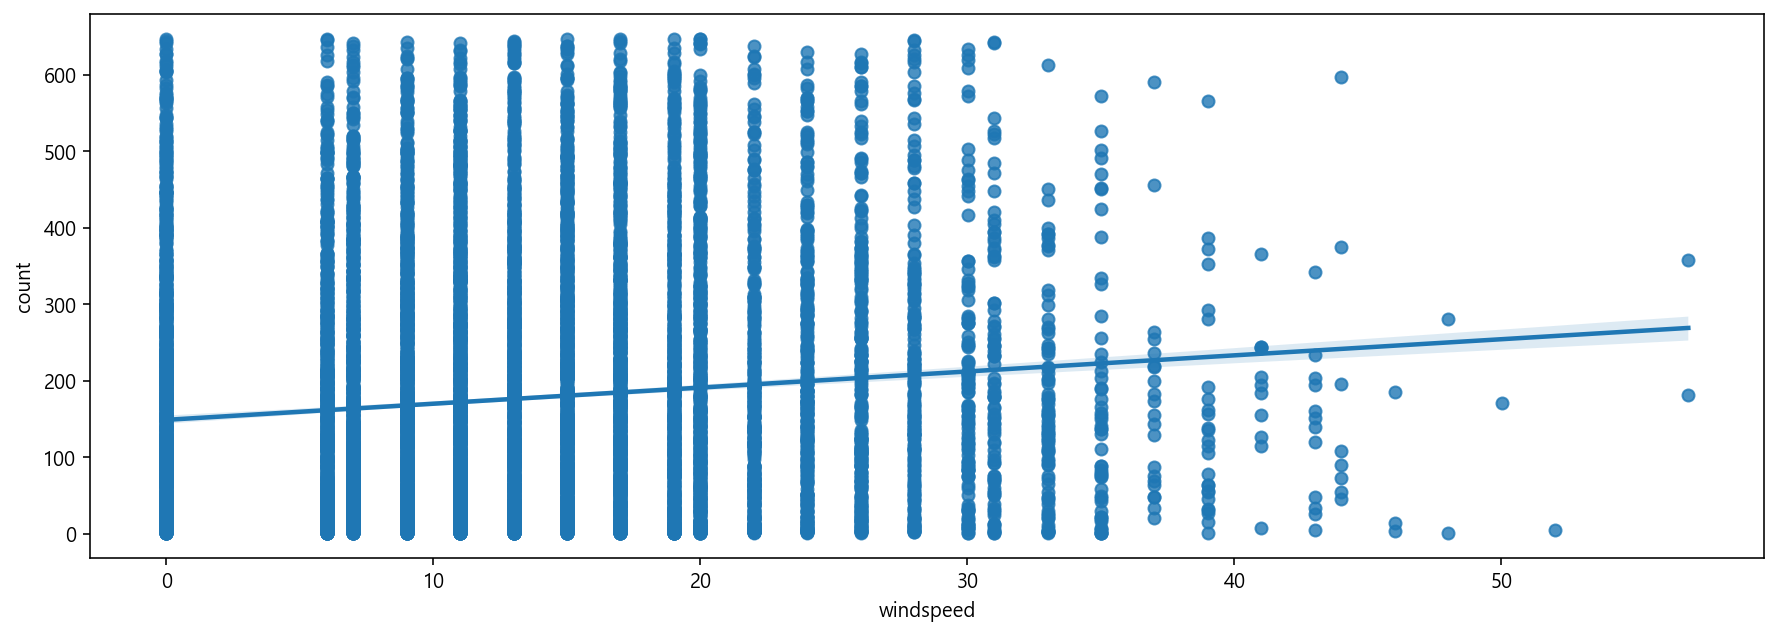

In [184]:
plt.figure(figsize=(15,5))
sns.regplot(data=train,x='windspeed',y='count')

<AxesSubplot:>

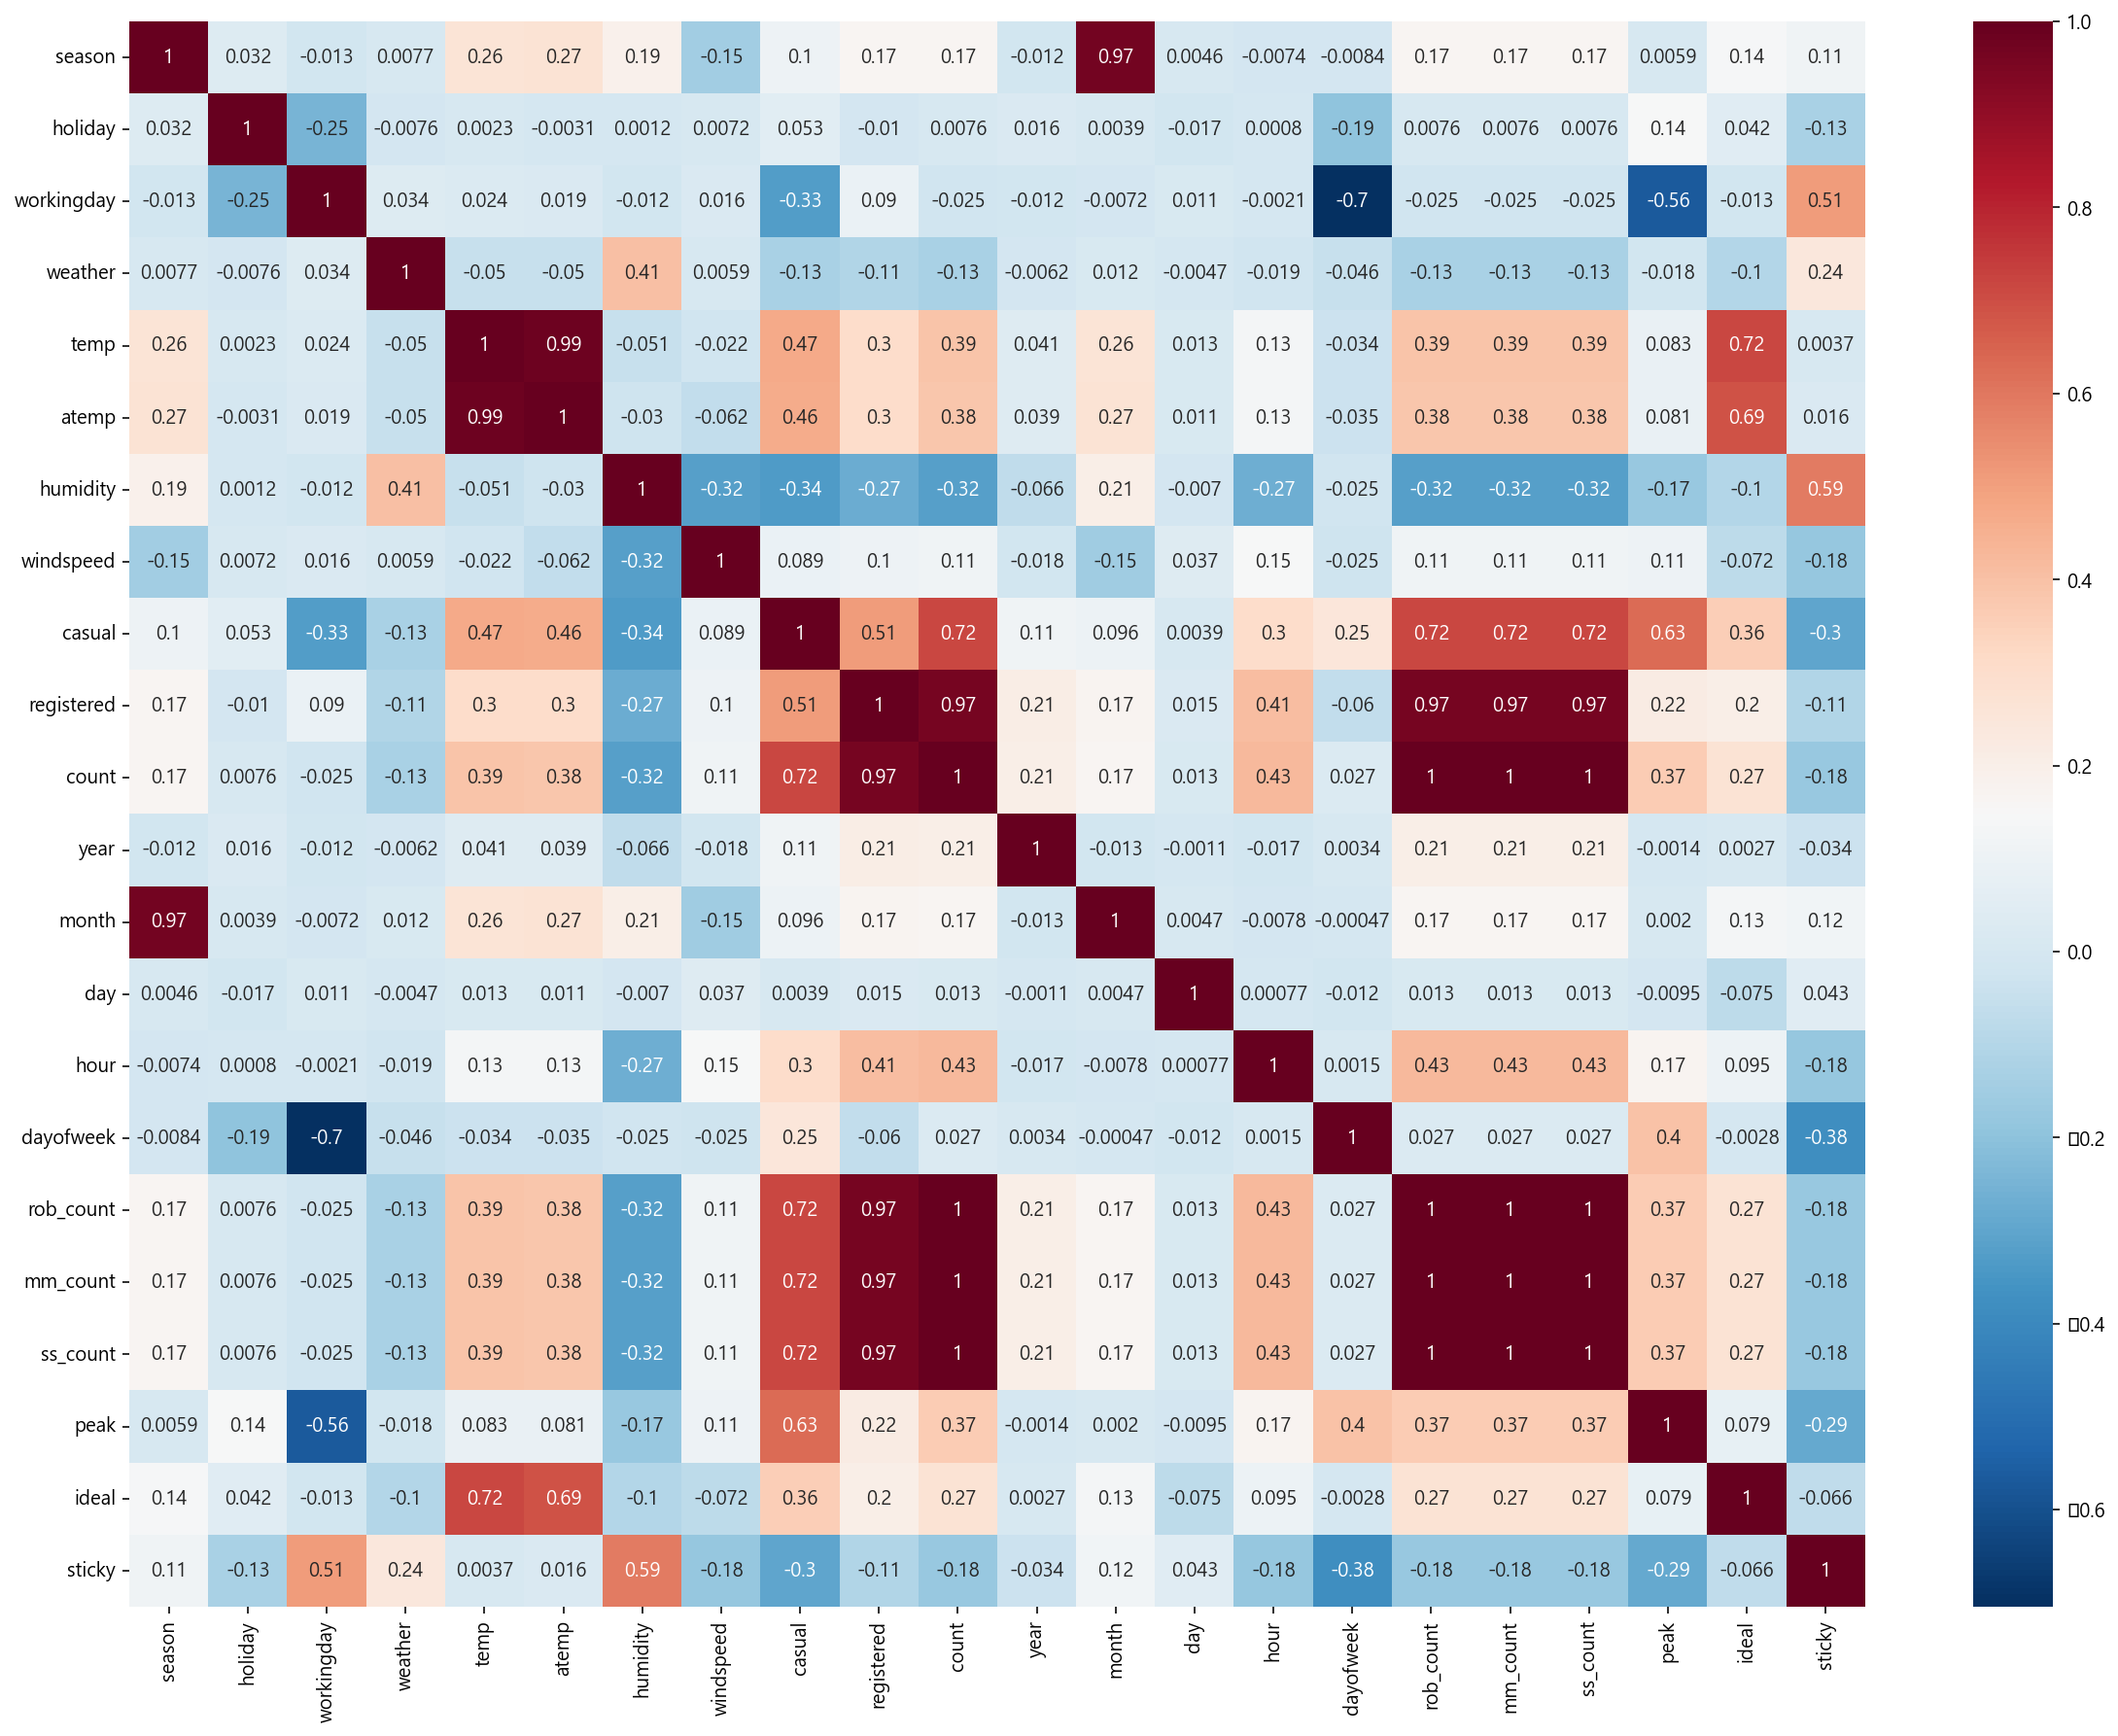

In [185]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True,cmap='RdBu_r')

In [186]:
train.reset_index(drop=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,-0.530435,0.023220,-1.021518,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,-0.426087,0.060372,-0.868019,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,-0.460870,0.047988,-0.919186,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,-0.543478,0.018576,-1.040706,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,-0.595652,0.000000,-1.117455,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,0.860870,0.518576,1.025137,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,0.447826,0.371517,0.417536,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,0.130435,0.258514,-0.049357,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,-0.039130,0.198142,-0.298793,0,0,1


In [187]:
y= train['count']

In [188]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,-0.530435,0.023220,-1.021518,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,-0.426087,0.060372,-0.868019,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,-0.460870,0.047988,-0.919186,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,-0.543478,0.018576,-1.040706,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,-0.595652,0.000000,-1.117455,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,0.860870,0.518576,1.025137,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,0.447826,0.371517,0.417536,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,0.130435,0.258514,-0.049357,0,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,-0.039130,0.198142,-0.298793,0,0,1


In [189]:
x = train.copy()

In [190]:
x = train.drop(columns=['registered','casual','day','datetime','hour'])

In [191]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=156)

In [192]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=5,random_state=42)

In [193]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
X_test_scale=ss.fit_transform(X_test)

In [194]:
from sklearn.model_selection import cross_validate
scores =cross_validate(rf,X_train,y_train)
print(scores)
print(X_scaled.shape,y_train.shape)
print(X_test_scale.shape,y_test.shape)

{'fit_time': array([0.07376027, 0.05939913, 0.07883739, 0.06257534, 0.07811236]), 'score_time': array([0.00199413, 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([0.99999915, 0.99999904, 0.99999901, 0.99999873, 0.99999893])}
(8468, 18) (8468,)
(2118, 18) (2118,)


In [195]:
rf.fit(X_scaled,y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [196]:
pred =rf.predict(X_test_scale)

In [197]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))

1.6977148253068932


<AxesSubplot:xlabel='count'>

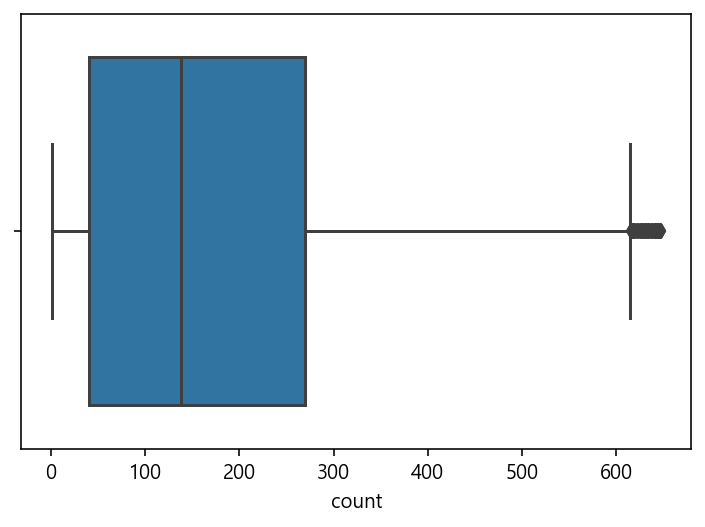

In [198]:
sns.boxplot(train['count'])

In [199]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=train, column='count', weight=1.5)
train.drop(outlier_idx, axis=0, inplace=True)

In [200]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dayofweek     0
rob_count     0
mm_count      0
ss_count      0
peak          0
ideal         0
sticky        0
dtype: int64

In [201]:
train.reset_index(drop=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,-0.530435,0.023220,-1.021518,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,-0.426087,0.060372,-0.868019,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,-0.460870,0.047988,-0.919186,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,-0.543478,0.018576,-1.040706,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,-0.595652,0.000000,-1.117455,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,0.860870,0.518576,1.025137,0,0,0
10502,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,0.447826,0.371517,0.417536,0,0,0
10503,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,0.130435,0.258514,-0.049357,0,0,1
10504,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,-0.039130,0.198142,-0.298793,0,0,1


<AxesSubplot:xlabel='count', ylabel='Density'>

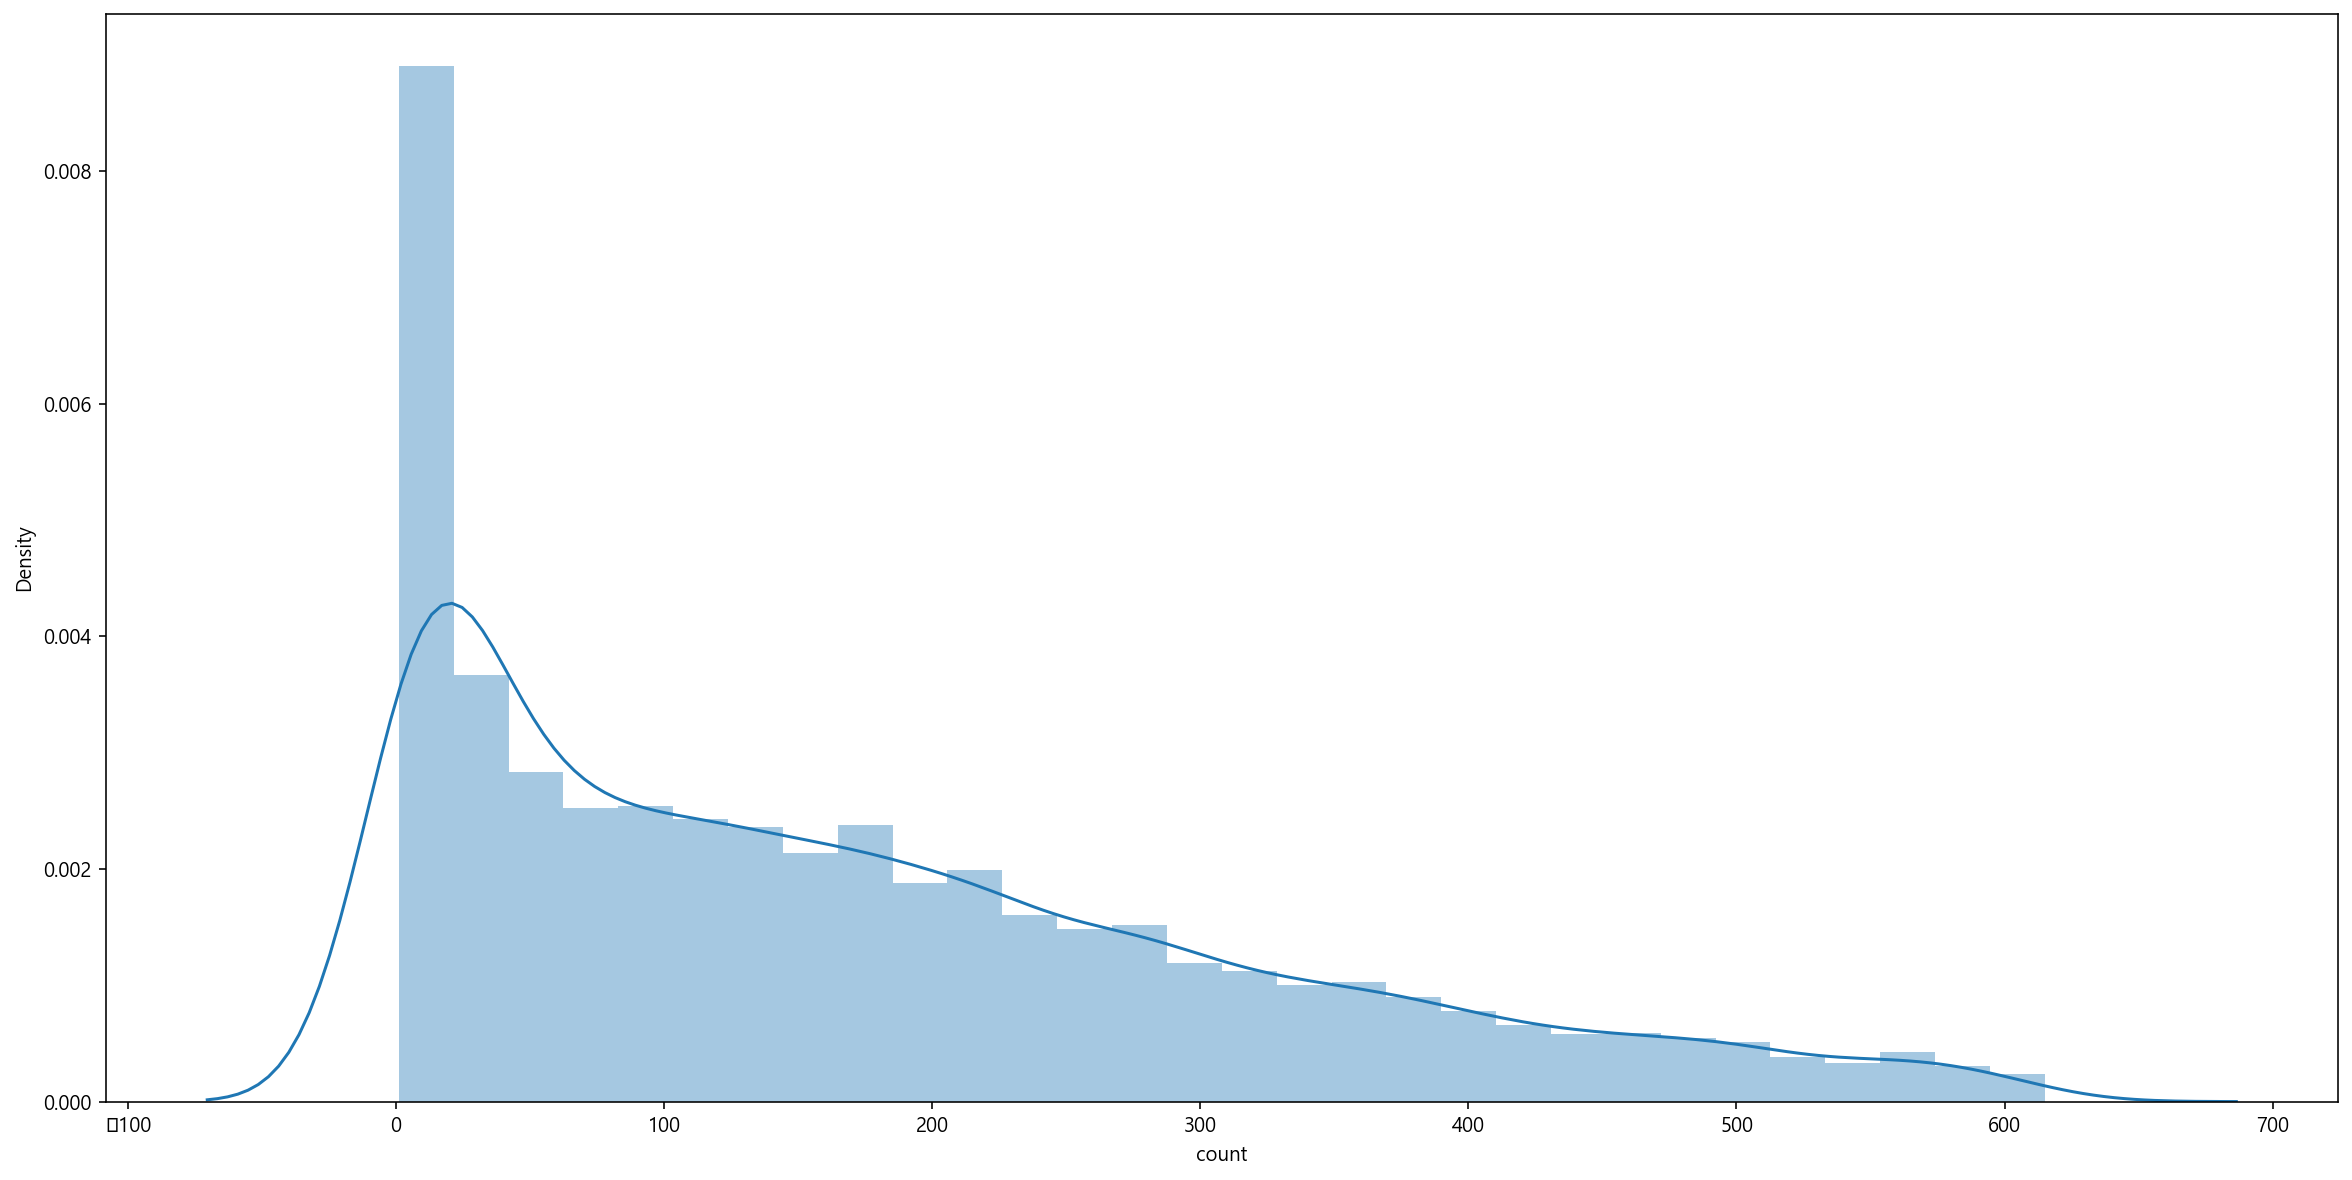

In [202]:
plt.figure(figsize=(20,10))
sns.distplot(train['count'])

In [203]:
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()
train[['rob_count']] = ro.fit_transform(train[['count']])

In [204]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
train[['mm_count']] = mm.fit_transform(train[['count']])

In [205]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train[['ss_count']] = ss.fit_transform(train[['count']])

<AxesSubplot:xlabel='rob_count', ylabel='Density'>

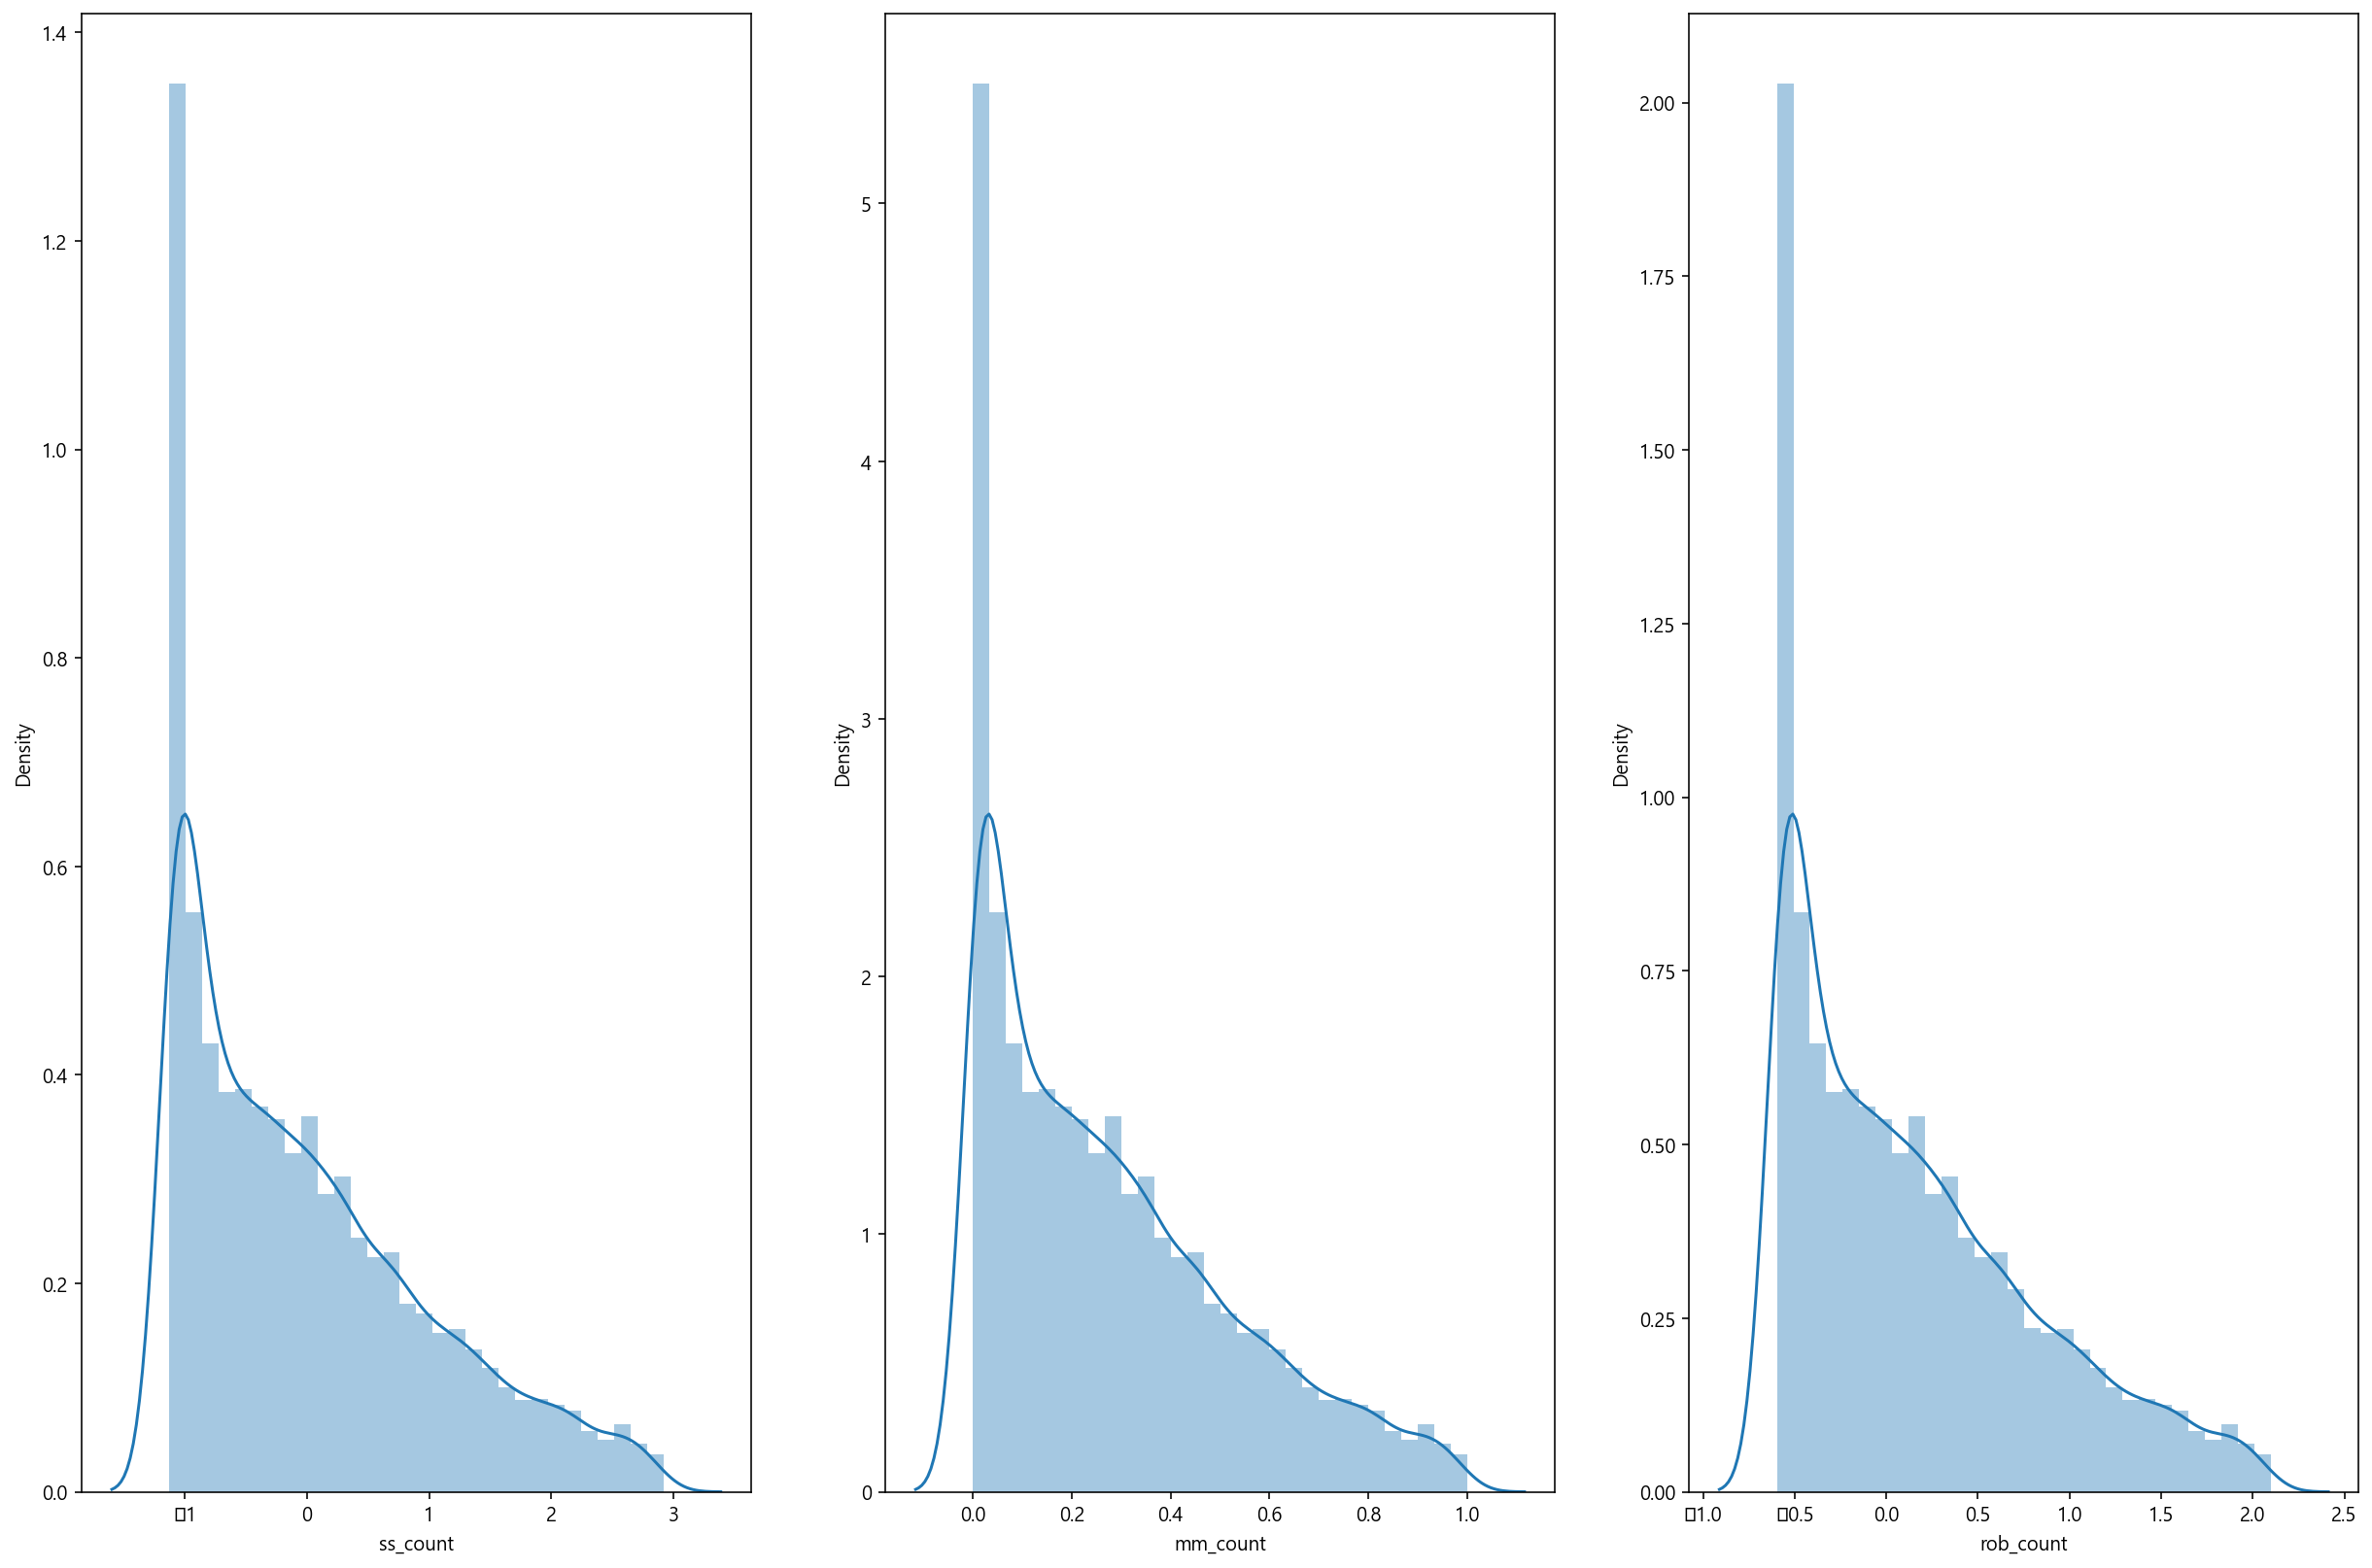

In [206]:
plt.figure(figsize=(21,14))
plt.subplot(131)
sns.distplot(train['ss_count'])
plt.subplot(132)
sns.distplot(train['mm_count'])
plt.subplot(133)
sns.distplot(train['rob_count'])

In [208]:
x = train.copy()

In [209]:
x = train.drop(columns=['registered','casual','day','datetime','count','ss_count','mm_count','rob_count'])

In [210]:
y=train['mm_count']

In [211]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=156)

In [212]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=5,random_state=42,oob_score=True)

In [213]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8404, 15) (8404,)
(2102, 15) (2102,)


In [214]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=42)

In [215]:
pred = rf.predict(X_test)

In [216]:
print(rf.oob_score_)

0.6733048162372027


In [217]:
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.004469716023103326
0.06685593483830232


<AxesSubplot:xlabel='windspeed', ylabel='count'>

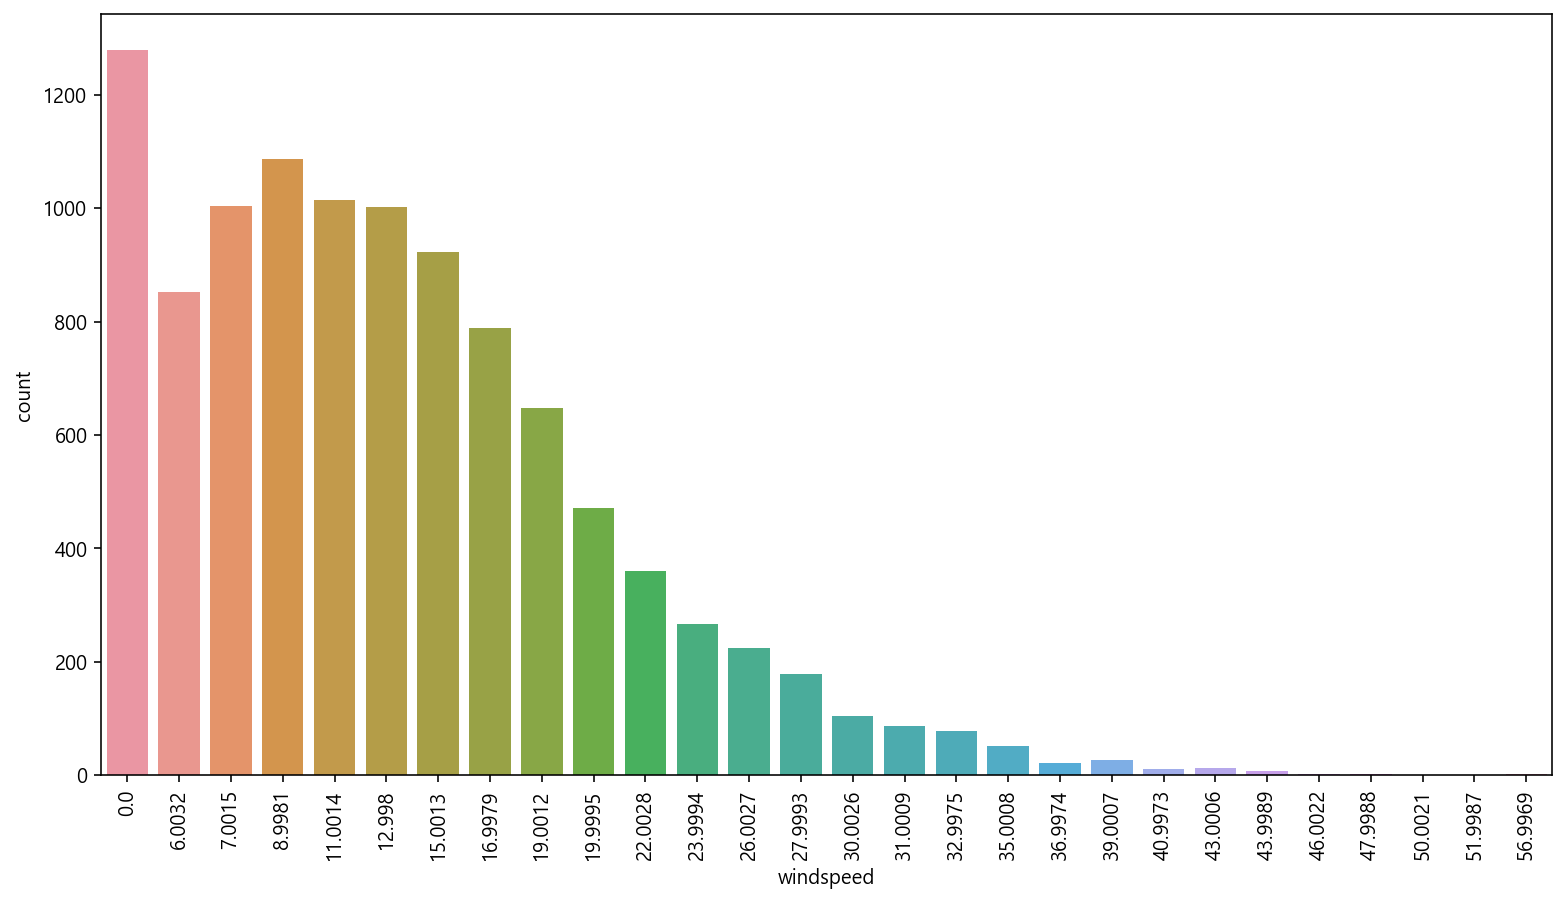

In [218]:
plt.figure(figsize=(13,7))
plt.xticks(rotation=90)
sns.countplot(train['windspeed']) 

In [219]:
trainwind0 = train[train['windspeed']==0]

In [220]:
trainwindnot0=train[train['windspeed']!=0]

In [221]:
trainwindnot0['windspeed'].mean()

14.525804746424328

In [222]:
x['windspeed']=x['windspeed'].apply(lambda x:trainwindnot0['windspeed'].mean() if x==0 else x)

In [223]:
train['hour'].value_counts()

23    456
22    456
21    456
20    456
7     455
10    455
9     455
0     455
6     455
1     454
11    453
5     452
2     448
15    445
16    444
12    444
14    442
4     442
19    439
13    437
3     433
18    368
8     361
17    345
Name: hour, dtype: int64

In [224]:
train['peak']=np.where((train['workingday']==1) &(train['hour']==8)| (train['hour']==17) |(train['hour']==18),1,0)


In [225]:
train[(train['workingday']==1) & (train['hour']==8) | (train['hour']==17) | (train['hour']==18)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
17,2011-01-01 17:00:00,1,0,0,2,18.04,21.970,82,19.0012,15,52,67,2011,1,1,17,5,-0.307355,0.107492,-0.693443,1,0,0
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35,2011,1,1,18,5,-0.447859,0.055375,-0.904294,1,0,0
40,2011-01-02 17:00:00,1,0,0,1,13.94,16.665,57,12.9980,7,58,65,2011,1,2,17,6,-0.316136,0.104235,-0.706622,1,0,0
41,2011-01-02 18:00:00,1,0,0,2,14.76,16.665,46,22.0028,10,43,53,2011,1,2,18,6,-0.368825,0.084691,-0.785691,1,0,0
53,2011-01-03 08:00:00,1,0,1,1,5.74,6.060,50,19.0012,1,153,154,2011,1,3,8,0,0.074643,0.249186,-0.120194,1,0,0
62,2011-01-03 17:00:00,1,0,1,1,9.84,11.365,30,15.0013,11,146,157,2011,1,3,17,0,0.087816,0.254072,-0.100427,1,0,0
63,2011-01-03 18:00:00,1,0,1,1,9.84,12.880,32,7.0015,9,148,157,2011,1,3,18,0,0.087816,0.254072,-0.100427,1,0,0
76,2011-01-04 08:00:00,1,0,1,1,5.74,7.575,69,11.0014,2,177,179,2011,1,4,8,1,0.184413,0.289902,0.044533,1,0,1
85,2011-01-04 17:00:00,1,0,1,1,11.48,13.635,48,15.0013,10,202,212,2011,1,4,17,1,0.329308,0.343648,0.261973,1,0,0
86,2011-01-04 18:00:00,1,0,1,1,10.66,12.880,48,12.9980,3,179,182,2011,1,4,18,1,0.197585,0.294788,0.064300,1,0,0


In [229]:
a= train[(train['workingday']==0)&(train['hour']<=19) & (train['hour']>=10)]
a['hour'].value_counts()

10    145
19    145
11    143
18    143
17    138
15    134
16    134
12    133
14    131
13    126
Name: hour, dtype: int64

In [230]:
train['peak']= np.where((train['workingday']==0)&(train['hour']<=19) | (train['hour']>=10),1,0)

In [231]:
train['peak'].value_counts()

1    7540
0    2966
Name: peak, dtype: int64

In [232]:
train[(train['temp']>27)&(train['windspeed']<30)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,118,191,2011,2,18,14,4,0.237102,0.309446,0.123602,1,1,0
844,2011-02-18 15:00:00,1,0,1,1,27.06,31.060,36,22.0028,55,117,172,2011,2,18,15,4,0.153677,0.278502,-0.001591,1,1,0
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,164,232,2011,2,18,16,4,0.417124,0.376221,0.393754,1,1,0
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,275,327,2011,2,18,17,4,0.834248,0.530945,1.019716,1,1,0
1289,2011-03-18 14:00:00,1,0,1,1,27.06,31.060,39,16.9979,71,103,174,2011,3,18,14,4,0.162459,0.281759,0.011588,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9628,2012-10-05 13:00:00,4,0,1,1,28.70,32.575,48,0.0000,117,307,424,2012,10,5,13,4,1.260154,0.688925,1.658857,1,1,0
9629,2012-10-05 14:00:00,4,0,1,1,30.34,32.575,37,15.0013,113,287,400,2012,10,5,14,4,1.154775,0.649837,1.500719,1,1,0
9630,2012-10-05 15:00:00,4,0,1,1,29.52,32.575,39,16.9979,150,320,470,2012,10,5,15,4,1.462130,0.763844,1.961954,1,1,0
9846,2012-10-14 15:00:00,4,0,0,1,27.06,31.060,39,27.9993,213,355,568,2012,10,14,15,6,1.892426,0.923453,2.607684,1,1,0


In [233]:
train['ideal']=np.where((train['temp']>27)&(train['windspeed']<30),1,0)

In [234]:
train[train['ideal']==1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,118,191,2011,2,18,14,4,0.237102,0.309446,0.123602,1,1,0
844,2011-02-18 15:00:00,1,0,1,1,27.06,31.060,36,22.0028,55,117,172,2011,2,18,15,4,0.153677,0.278502,-0.001591,1,1,0
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,164,232,2011,2,18,16,4,0.417124,0.376221,0.393754,1,1,0
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,275,327,2011,2,18,17,4,0.834248,0.530945,1.019716,1,1,0
1289,2011-03-18 14:00:00,1,0,1,1,27.06,31.060,39,16.9979,71,103,174,2011,3,18,14,4,0.162459,0.281759,0.011588,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9628,2012-10-05 13:00:00,4,0,1,1,28.70,32.575,48,0.0000,117,307,424,2012,10,5,13,4,1.260154,0.688925,1.658857,1,1,0
9629,2012-10-05 14:00:00,4,0,1,1,30.34,32.575,37,15.0013,113,287,400,2012,10,5,14,4,1.154775,0.649837,1.500719,1,1,0
9630,2012-10-05 15:00:00,4,0,1,1,29.52,32.575,39,16.9979,150,320,470,2012,10,5,15,4,1.462130,0.763844,1.961954,1,1,0
9846,2012-10-14 15:00:00,4,0,0,1,27.06,31.060,39,27.9993,213,355,568,2012,10,14,15,6,1.892426,0.923453,2.607684,1,1,0


In [235]:
train[(train['humidity']>60)&(train['workingday']==1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,rob_count,mm_count,ss_count,peak,ideal,sticky
66,2011-01-03 21:00:00,1,0,1,1,7.38,9.850,64,8.9981,3,49,52,2011,1,3,21,0,-0.373216,0.083062,-0.792280,1,0,1
67,2011-01-03 22:00:00,1,0,1,1,5.74,7.575,69,8.9981,0,20,20,2011,1,3,22,0,-0.513721,0.030945,-1.003130,1,0,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1,2011,1,4,2,1,-0.597146,0.000000,-1.128322,0,0,1
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,2,2011,1,4,4,1,-0.592755,0.001629,-1.121733,0,0,1
73,2011-01-04 05:00:00,1,0,1,1,4.92,7.575,68,7.0015,0,4,4,2011,1,4,5,1,-0.583974,0.004886,-1.108555,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317,2012,12,19,9,2,0.790340,0.514658,0.953825,0,0,1
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164,2012,12,19,10,2,0.118551,0.265472,-0.054303,1,0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,0.136114,0.271987,-0.027947,1,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,-0.035126,0.208469,-0.284921,1,0,1


In [236]:
train['sticky']=np.where((train['humidity']>60)&(train['workingday']==1),1,0)

In [237]:
train['sticky'].value_counts()

0    6796
1    3710
Name: sticky, dtype: int64

<AxesSubplot:>

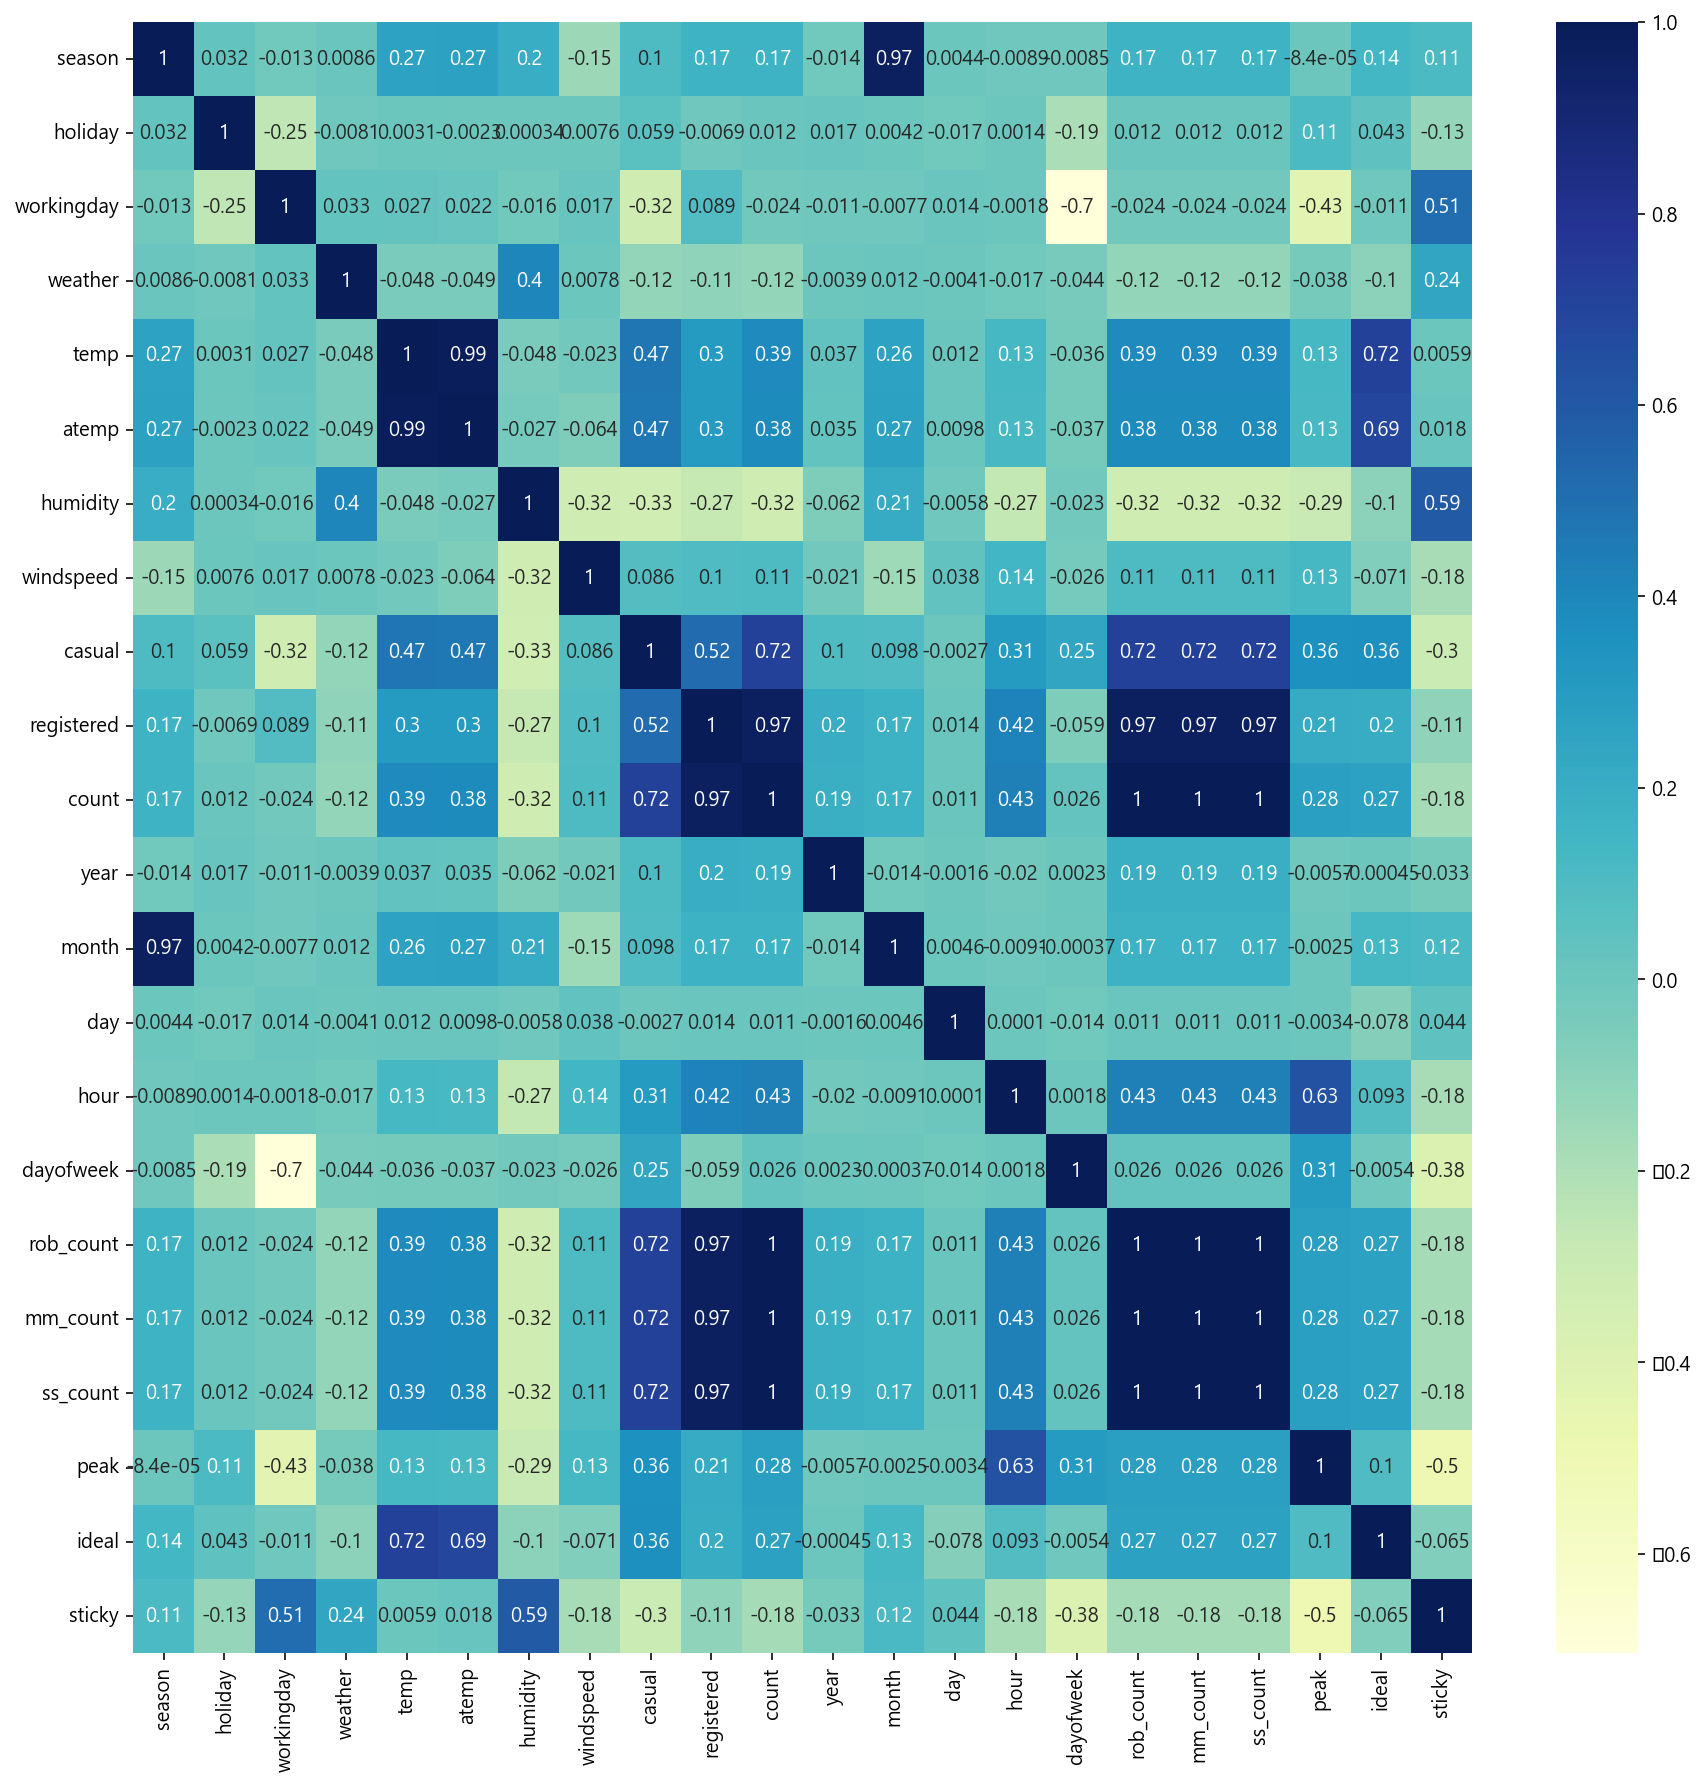

In [238]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')

In [239]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek', 'rob_count', 'mm_count',
       'ss_count', 'peak', 'ideal', 'sticky'],
      dtype='object')

In [240]:
x=train.copy()

In [241]:
y

0        0.024430
1        0.063518
2        0.050489
3        0.019544
4        0.000000
           ...   
10881    0.545603
10882    0.390879
10883    0.271987
10884    0.208469
10885    0.141694
Name: mm_count, Length: 10506, dtype: float64

In [245]:
y=train['rob_count']

In [246]:
x=x.drop(columns=['datetime','casual','registered','count','day','ss_count','mm_count','rob_count'])

In [247]:
## 데이터 셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
rf = RandomForestRegressor(n_estimators=130,n_jobs=-1,oob_score=True,max_depth=5)

In [250]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=130, n_jobs=-1, oob_score=True)

In [251]:
pred = rf.predict(X_test)

In [252]:
from sklearn.metrics import mean_squared_error
print(rf.oob_score_)
print(rf.base_estimator_)
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.6844322954611783
DecisionTreeRegressor()
0.13587561842567986
0.36861310126700575


In [253]:
feature_importance = rf.feature_importances_

In [254]:
x.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek', 'peak',
       'ideal', 'sticky'],
      dtype='object')

In [255]:
feature_importance= pd.Series(rf.feature_importances_,x.columns)

In [256]:
feature_importance=feature_importance.sort_values(ascending=False)

<AxesSubplot:title={'center':'feature importance'}>

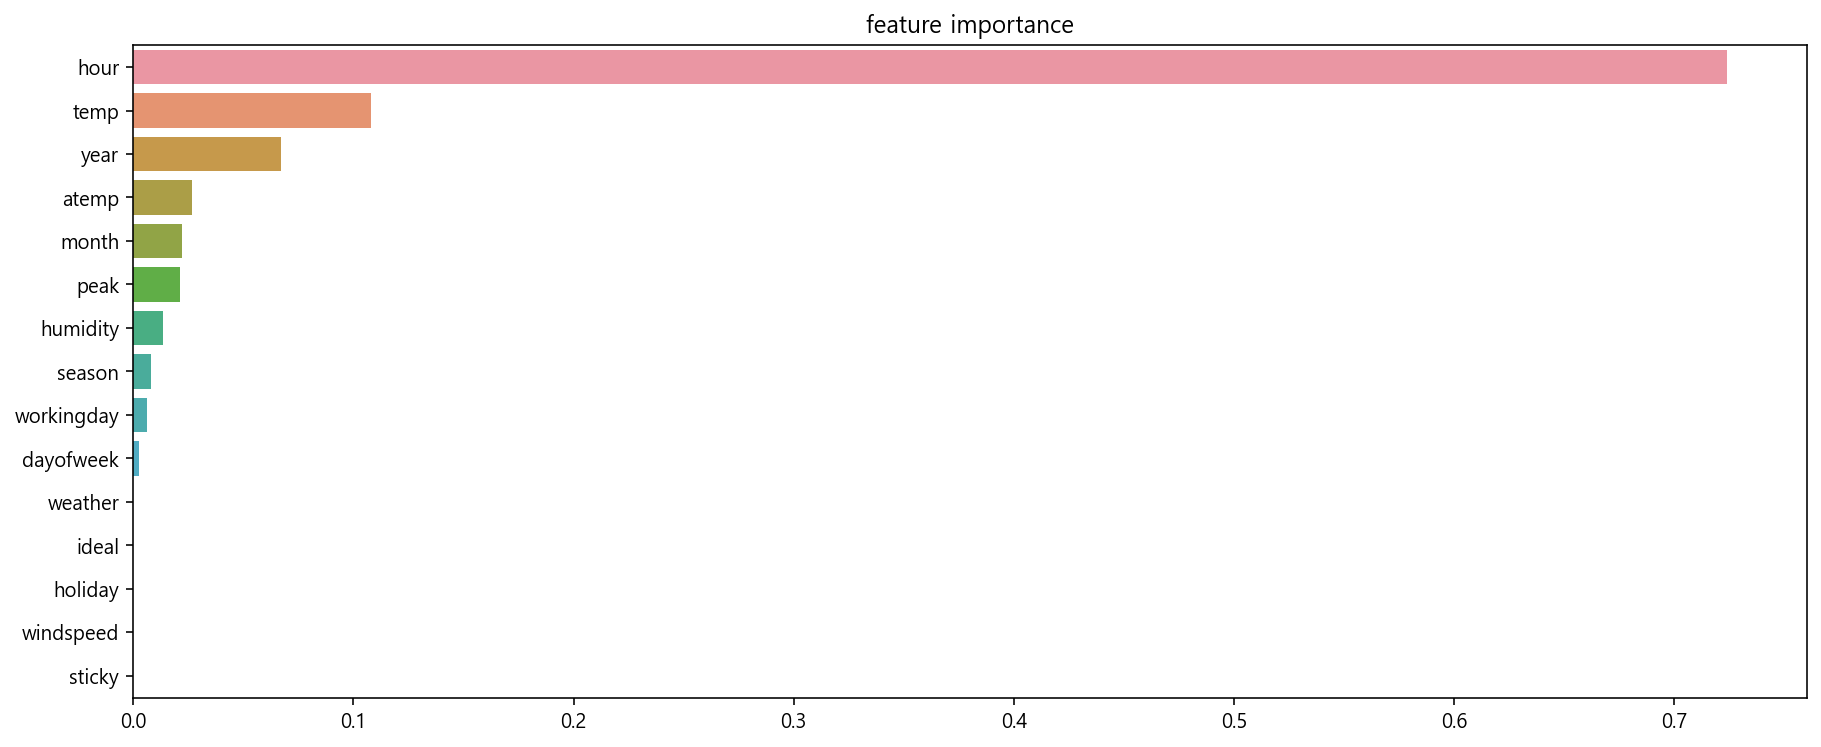

In [257]:
plt.figure(figsize=(15,6))
plt.title('feature importance')
sns.barplot(x=feature_importance,y=feature_importance.index)

In [258]:
rf.estimators_[2]

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=1140397512)

In [259]:
from sklearn import tree
dt_dot_data = tree.export_graphviz(rf.estimators_[2],out_file=None
                                  ,feature_names=x.columns,
                                  class_names=None,
                                  filled=True,rounded=True,
                                  special_characters=True)


In [260]:
pydotplus.graph_from_dot_data(dt_dot_data)

In [261]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

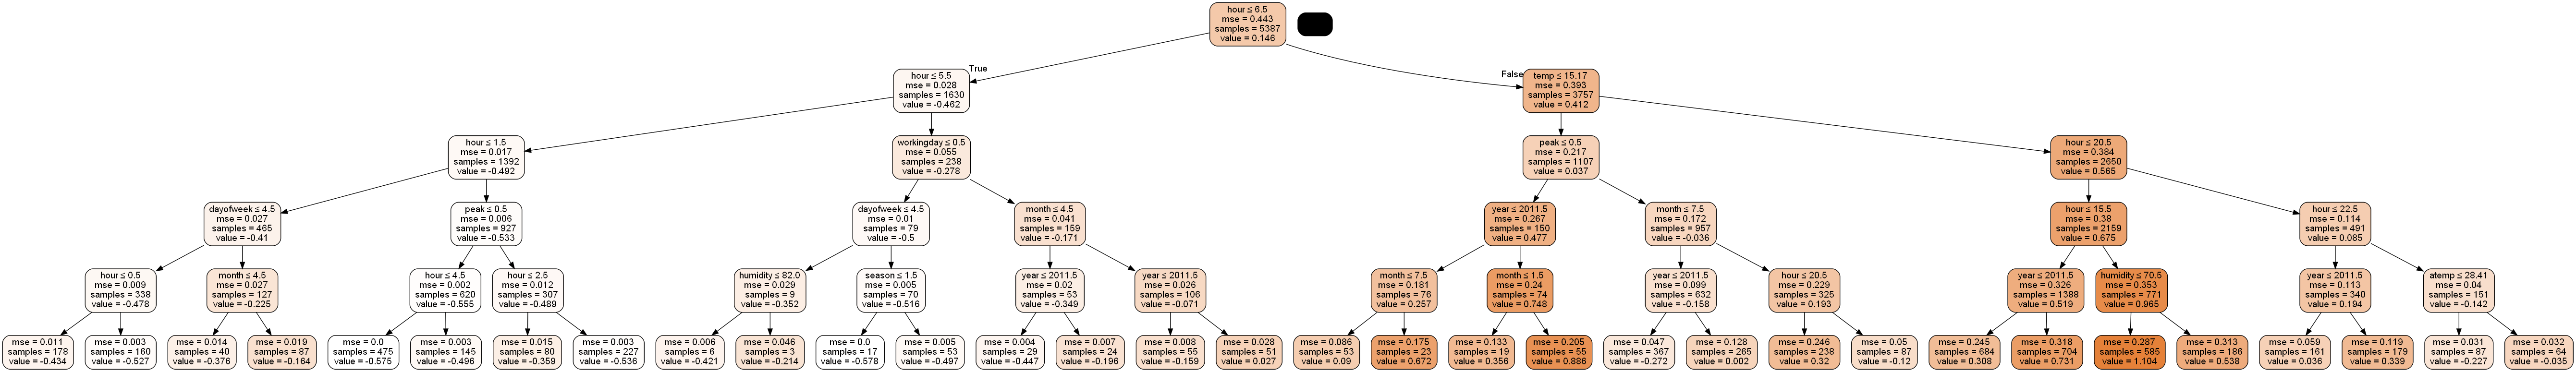

In [262]:
Image(dt_graph.create_png())

In [263]:
from  xgboost import  XGBRegressor

In [264]:
xgb=XGBRegressor()

In [265]:
# print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
# print('best score', gcv.best_score_)      # 최고의 점수

In [266]:
best_model = XGBRegressor(
                         gamma= 0, 
                          max_depth= 9, 
                          alpha=1,
                          min_child_weight= 5, 
                          n_estimators= 370,
                         learning_rate=0.055555555555
)

In [267]:
best_model.fit(X_train,y_train)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.055555555555,
             max_delta_step=0, max_depth=9, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=370, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [268]:
pred = best_model.predict(X_test)

In [269]:
from sklearn.metrics import mean_squared_error

print("MSE: %.4f"%mean_squared_error(y_test,pred))
print("RMSE: %.4f"%np.sqrt(mean_squared_error(y_test,pred)))

MSE: 0.0221
RMSE: 0.1485


In [270]:
feature_importance = pd.Series(best_model.feature_importances_,X_train.columns).sort_values(ascending=False)

In [271]:
feature_importance

hour          0.212720
peak          0.212172
year          0.188974
workingday    0.137956
temp          0.058474
season        0.038389
month         0.032162
weather       0.032081
atemp         0.023963
dayofweek     0.018695
humidity      0.015773
holiday       0.011046
sticky        0.009899
ideal         0.005052
windspeed     0.002643
dtype: float32

<AxesSubplot:>

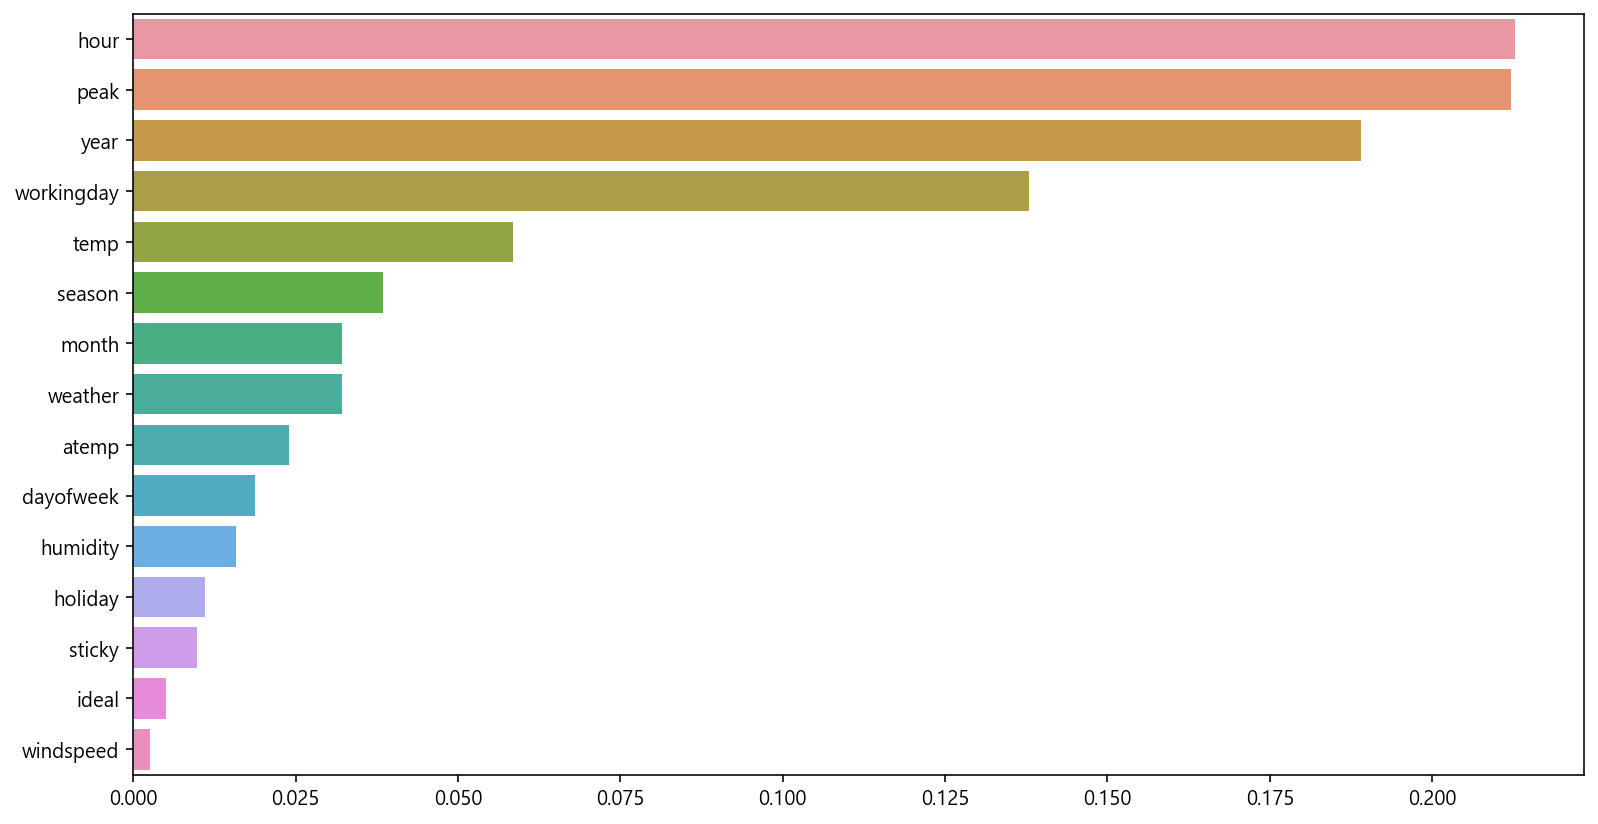

In [272]:
plt.figure(figsize=(13,7))
sns.barplot(x=feature_importance,y=feature_importance.index)